In [1]:
import math
import numpy as np
import scipy.integrate as integrate
import scipy.io as sio
import matplotlib.pyplot as plt

DEPTH = 11

### Assumptions

In [2]:
g = 9.81 # gravitational acceleration [m/s^2]
R = 8.3145 # gas constant [J/Kmol]

rho_cc = 2850 # density of continental crust [kg/m^3]

cm = 200000 # thickness of continental  mantle [m]
cc = 35000 # thickness of continental crust [m]

In [3]:
compensation_depth = cc + cm # compensation depth

initial_depth = 0
depth_increment = 1000
final_depth = compensation_depth+depth_increment
z = list(range(initial_depth,final_depth,depth_increment)) # depth [m]

### Calculating the rate of radiogenic heat production $H$
#### Present day Earth

In [4]:
K_con = ((1.5*10**4)/10**6)
K40_con = (1.28/10**4)*K_con
U_con = (1.3/10**6)
U238_con = 0.9927*U_con
U235_con = 0.0072*U_con
Th_con = (5.6/10**6)

K_heat = (2.79/10**5)*K40_con
U238_heat = (9.37/10**5)*U238_con
U235_heat = (5.69/10**4)*U235_con
Th_heat = (2.69/10**5)*Th_con

H = K_heat+Th_heat+U238_heat+U235_heat # rate of radiogenic heat production [W/kg]
print("Rate of radiogenic heat production: %.2e [W/Kg]"%H)

Rate of radiogenic heat production: 3.30e-10 [W/Kg]


#### Archean Earth

In [5]:
t = 3.5 # [Gyr]
K_con = ((1.5*10**4)/10**6)
K40_con = (1.28/10**4)*K_con*math.exp(0.555*t)

U_con = (1.3/10**6)
U238_con = 0.9927*U_con*math.exp(0.155*t)
U235_con = 0.0072*U_con*math.exp(0.985*t)

Th_con = (5.6/10**6)*math.exp(0.0495*t)

K_heat = (2.79/10**5)*K40_con
U238_heat = (9.37/10**5)*U238_con
U235_heat = (5.69/10**4)*U235_con
Th_heat = (2.69/10**5)*Th_con

H_archean = K_heat+Th_heat+U238_heat+U235_heat # rate of radiogenic heat production [W/kg]
print("H(t) at t = %.1f Ga: %.2e [W/Kg]"%(t, H_archean))

H(t) at t = 3.5 Ga: 9.28e-10 [W/Kg]


### Calculating Earth's geotherm
Starting with the heat equation
$$0 = k\frac{d^2T}{dz^2}+\rho H$$

where $H$ is rate of internal heat production ($W/kg$).

Integrate to get:
$$C = k\frac{dT}{dz}+\rho Hz$$

Integrate again:
$$D+Cz = kT + \frac{1}{2}\rho Hz^2$$

$$T = \frac{Cz}{k}-\frac{1}{2k}\rho Hz^2 + \frac{D}{k}$$

From the boundary condition that $T(z=0) = 0$, we have $D = 0$. The temperature gradient within the continental crust is:

$$T_1 = \frac{C_1}{k_1}z_1-\frac{1}{2k_1}\rho_1 Hz_1^2$$

where $C_1$ is the surface heat flow (from boundary condition $z = 0$)

The temperature at the base of the continental lithosphere is:
$$T_m = T_p + (d_{cc}+d_{cm})\left(\frac{\partial T}{\partial z}\right)$$

In [6]:
T_p = 1350 # potential temperature for the current Earth [C]
T_p_archean = 1600 # potential temperature of the Archean earth [C]
dT_dz = 0.5 # adiabatic gradient [K/km]
cc=35000 # thickness of continental crust
T_m = T_p + (cc+cm)/1000*dT_dz
T_m_archean = T_p_archean + (cc+cm)/1000*dT_dz
print("Assuming continental crustal thickness of %i [km] and continental lithospheric mantle thickness of %i [km]"%((cc/1000),(cm/1000)))
print("Mantle temperature: %i [C]"%T_m)
print("Archean mantle temperature: %i [C]"%T_m_archean)

Assuming continental crustal thickness of 35 [km] and continental lithospheric mantle thickness of 200 [km]
Mantle temperature: 1467 [C]
Archean mantle temperature: 1717 [C]


where the temperature potential of the mantle $T_p$ is $\sim 1350^{\circ}$C (now) and $1600^{\circ}$C (Archean)

We assume that the adiabatic gradient $\left(\frac{\partial T}{\partial z}\right) \sim 0.5$ K/km

Thus, $T_m \sim 1470^{\circ}$C (now) and $\sim 1720^{\circ}$C (Archean)

The temperature gradient below the continental crust is:
$$T_2 = \frac{C_2}{k_2}z_2+D_2$$

We have three unknowns ($C_1$, $C_2$, $D_2$) and three boundary conditions.

At $z_1 = z_2 = d_{cc}$, we require that:
$$T_1 = T_2$$

$$k_1\frac{dT_1}{dz_1} = k_2\frac{dT_2}{dz_1}$$

at $z_2 = d_{cc}+d_{cm}$, we have:
$$T_2 = T_m$$

1) Using $k_1\frac{dT_1}{dz_1} = k_2\frac{dT_2}{dz_1}$:

$$C_1-\rho_1 Hz\Bigg\vert_{z = z_1} = C_2\Bigg\vert_{z=z_1}$$

$$C_1-\rho_1 Hz_1 = C_2$$

2) Using $T_1 = T_2$:
$$\frac{C_1}{k_1}z_1 - \frac{1}{2k_1}\rho_1 Hz_1^2 = \frac{C_2}{k_2}z_1 + D_2$$

3) Using $T_2 = T_m$:
$$\frac{C_2}{k_2}z_2 + D_2 = T_m$$

Combining (2) and (3):
$$D_2 = T_m - \frac{C_2}{k_2}z_2$$

$$\frac{C_1}{k_1}z_1 - \frac{1}{2k_1}\rho_1 Hz_1^2 = \frac{C_2}{k_2}z_1 + T_m - \frac{C_2}{k_2}z_2$$

Writing $C_1$ in terms of $C_2$:
$$C_1 = \frac{C_2k_1}{k_2} - \frac{C_2k_1}{k_2}\frac{z_2}{z_1} + \frac{T_mk_1}{z_1} + \frac{1}{2}\rho_1 Hz_1$$

Solving for $C_2$ in (1):
$$C_1 = C_2 +\rho_1 Hz_1$$

$$C_2 + \rho_1 Hz_1 = \frac{C_2k_1}{k_2} - \frac{C_2k_1}{k_2}\frac{z_2}{z_1} + \frac{T_mk_1}{z_1} + \frac{1}{2}\rho_1 Hz_1$$

$$C_2 - \frac{C_2k_1}{k_2} + \frac{C_2k_1}{k_2}\frac{z_2}{z_1}= \frac{T_mk_1}{z_1} - \frac{1}{2}\rho_1 Hz_1$$


$$C_2\left(1 - \frac{k_1}{k_2} + \frac{k_1}{k_2}\frac{z_2}{z_1}\right) = \frac{T_mk_1}{z_1} - \frac{1}{2}\rho_1 Hz_1$$

$$C_2 = \frac{\left(\frac{T_mk_1}{z_1} - \frac{1}{2}\rho_1 Hz_1\right)}{\left(1 - \frac{k_1}{k_2} + \frac{k_1}{k_2}\frac{z_2}{z_1}\right)}$$

In [7]:
k_1 = 3.0 # Thermal conductivity of the crustal layer [W/mK] (assume constant)
k_2 = 3.0 # Thermal conductivity of the upper mantle
numerator = (T_m*k_1)/cc - (1/2)*rho_cc*H*cc
denominator = 1 - (k_1/k_2) + (k_1/k_2)*((cc+cm)/cc)
C_2 = numerator/denominator
print("C_2 = %.2f"%C_2)
numerator = (T_m_archean*k_1)/cc - (1/2)*rho_cc*H_archean*cc
denominator = 1 - (k_1/k_2) + (k_1/k_2)*((cc+cm)/cc)
C_2_archean = numerator/denominator
print("C_2 archean = %.2f"%C_2_archean)

C_2 = 0.02
C_2 archean = 0.02


calculating $C_1$ from $C_2$:
$$C_1 = C_2 +\rho_1 Hz_1$$

In [8]:
C_1 = C_2+rho_cc*H*cc
print("C_1 (surface heat flow): %.2f"%C_1)
C_1_archean = C_2_archean+rho_cc*H_archean*cc
print("C_1 archean: %.2f"%C_1_archean)

C_1 (surface heat flow): 0.05
C_1 archean: 0.11


calculating $D$ from $C_2$:
$$D_2 = T_m - \frac{C_2}{k_2}z_2$$

In [9]:
D_2 = T_m-(C_2*(cm))/k_2
print("D_2 = %.2f K"%D_2)
D_2_archean = T_m_archean-(C_2_archean*(cm))/k_2
print("D_2 archean = %.2f K"%D_2_archean)

D_2 = 382.21 K
D_2 archean = 715.46 K


In [10]:
def calc_geotherm(z,C_1,C_2,D_2,H):
    """
    Calculates the geothermal gradient.
    z: depth [m]
    C_1: surface heat flow
    C_2: internal heat flow (?)
    D_2: constant [K] 
    H: radiogenic heat flow (W/kg)
    """
    T = np.ones(len(z))
    T_0 = 273 # surface temperature [K]
    
    # index of end of crustal layer
    i = int(np.where(z==cc)[0])
    # temperature within the crust 
    for j, z_1 in enumerate(z[:i]):
        T[j] = T_0 + (C_1*z_1)/k_1  - ((rho_cc*H*z_1**2)/(2*k_1))
    # temperature below the crust
    for m, z_2 in enumerate(z[i:]):
        T[m+j+1] = ((z_2-cc)/k_2)*C_2 + D_2 + T_0
    return T

<Figure size 432x288 with 0 Axes>

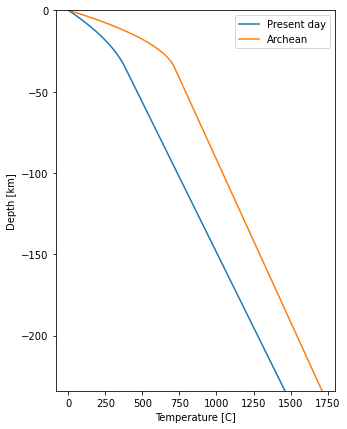

In [11]:
z = np.array(range(initial_depth,cc+cm,depth_increment))# depth [m]
T = calc_geotherm(z,C_1,C_2,D_2,H)
T_archean = calc_geotherm(z,C_1_archean,C_2_archean,D_2_archean,H_archean)
plt.figure(4)
plt.figure(figsize=(5,7))
plt.plot(T-273,[-i/1000 for i in z])
plt.plot(T_archean-273,[-i/1000 for i in z])
plt.ylim((-z[-1]/1000,0))
plt.xlabel('Temperature [C]')
plt.ylabel('Depth [km]')
plt.legend(['Present day','Archean'])
plt.show()

In [12]:
%store z
%store T
%store T_archean

Stored 'z' (ndarray)
Stored 'T' (ndarray)
Stored 'T_archean' (ndarray)


### Predicting strain rates

In [13]:
# importing differential pressure data calculated from isostasy_calculation
%store -r data_P
present_day = data_P[0]
P_diff_present = [i[0] for i in present_day]
cc_present = [i[1] for i in present_day]
archean = data_P[1]
P_diff_archean = [i[0] for i in archean]
cc_archean = [i[1] for i in archean]

sigma = np.array(P_diff_present) # differential pressure [MPa]
sigma_archean = P_diff_archean
C_OH = 4500 # water content [H/10^6 Si]
f_H2O = 4500 # water fugacity [MPa]

#### Present day Earth

In [14]:
e_RB, e_GT, e_LP, e_F= ([[]]*len(sigma) for i in range(4))

In [15]:
for i,P in enumerate(sigma):
    # Rutter & Brodie (2004) inversion results
    e_RB[i] = 10**(-5.2)*np.multiply(np.power(P[:DEPTH]+0.1,3.5),np.exp(np.divide(-208000,np.multiply(R,T[:DEPTH]))))
    # Gleason & Tullis (1995)
    e_GT[i] = 10**(-6.7)*np.multiply(np.power(P[:DEPTH]+0.1,3.9),np.exp(np.divide(-145000,np.multiply(R,T[:DEPTH]))))
    # Luan & Paterson (1992)
    e_LP[i] = 10**(-11.2)*np.multiply(np.power(P[:DEPTH]+0.1,3.4)*C_OH**(1.1),np.exp(np.divide(-138000,np.multiply(R,T[:DEPTH]))))
    # Fukuda et al. (2018)
    e_F[i] = 10**(-19.7)*np.multiply(np.power(P[:DEPTH]+0.1,3.6)*f_H2O**(1.9),np.exp(np.divide(-30000,np.multiply(R,T[:DEPTH]))))

# number of flow laws
n = 4

e = e_names = [[]]*n
e = [e_RB,e_GT,e_LP,e_F]
e_names = ['Rutter & Brodie (2004)','Gleason & Tullis (1995)','Luan & Paterson (1992)','Fukuda et al. (2018)']

In [16]:
%store -r IQR
%store -r IQR_archean

<Figure size 432x288 with 0 Axes>

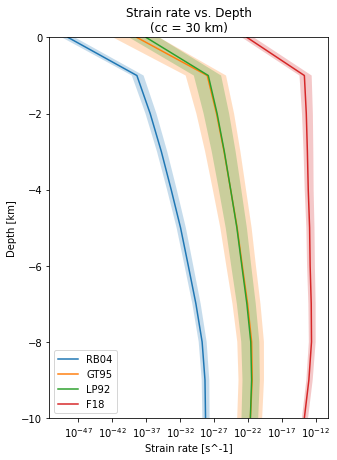

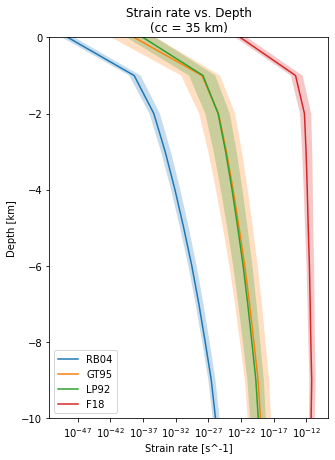

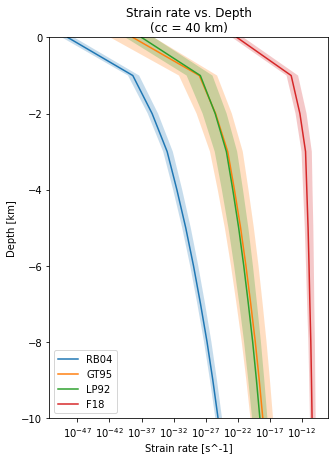

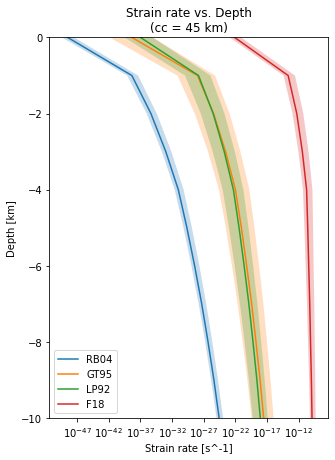

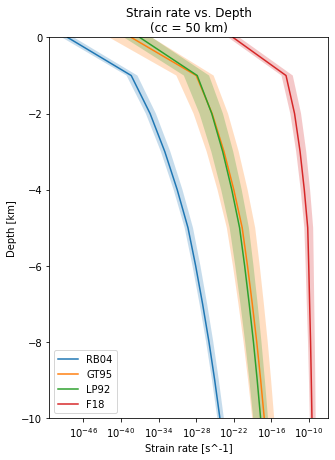

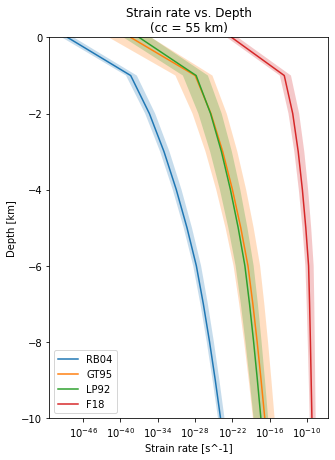

In [17]:
fig = plt.figure()
for i in range(len(sigma)):
    plt.figure(figsize=(5,7))
    for j,strain_rate in enumerate(e):
        plt.semilogx(strain_rate[i],-z[:DEPTH]/1000)
        plt.fill_betweenx(-z[:DEPTH]/1000, IQR[j][1][i], IQR[j][2][i], alpha=0.25)
        plt.ylim((-10,0))
    plt.legend(['RB04','GT95','LP92','F18'])
    plt.xlabel('Strain rate [s^-1]')
    plt.ylabel('Depth [km]')
    plt.title('Strain rate vs. Depth\n(cc = %i km)'%(cc_present[i]/1000))
    plt.show()

#### Archean Earth

In [18]:
e_RB_archean, e_GT_archean, e_LP_archean, e_F_archean= ([[]]*len(sigma_archean) for i in range(4))

for i,P in enumerate(sigma_archean):
    # Rutter & Brodie (2004) inversion results
    for j in range(DEPTH):
        e_RB_archean[i] = 10**(-5.2)*np.multiply(np.power(P[:DEPTH]+0.1,3.5),np.exp(np.divide(-208000,np.multiply(R,T_archean[:DEPTH]))))
        # Gleason & Tullis (1995)
        e_GT_archean[i] = 10**(-6.7)*np.multiply(np.power(P[:DEPTH]+0.1,3.9),np.exp(np.divide(-145000,np.multiply(R,T_archean[:DEPTH]))))
        # Luan & Paterson (1992)
        e_LP_archean[i] = 10**(-11.2)*np.multiply(np.power(P[:DEPTH]+0.1,3.4)*C_OH**(1.1),np.exp(np.divide(-138000,np.multiply(R,T_archean[:DEPTH]))))
        # Fukuda et al. (2018)
        e_F_archean[i] = 10**(-19.7)*np.multiply(np.power(P[:DEPTH]+0.1,3.6)*f_H2O**(1.9),np.exp(np.divide(-30000,np.multiply(R,T_archean[:DEPTH]))))
        
e_archean = [[]]*n
e_archean = [e_RB_archean,e_GT_archean,e_LP_archean,e_F_archean]

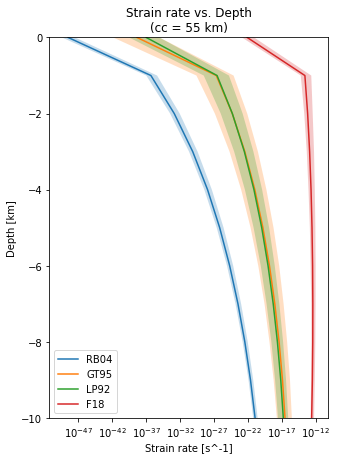

In [19]:
for i in range(len(sigma_archean)):
    plt.figure(figsize=(5,7))
    for j,strain_rate in enumerate(e_archean):
        plt.semilogx(strain_rate[i],-z[:DEPTH]/1000)
        plt.fill_betweenx(-z[:DEPTH]/1000, IQR_archean[j][1][i], IQR_archean[j][2][i], alpha=0.25)
    plt.ylim((-10,0))
    #plt.xlim((10**-30,10**-10))
    plt.legend(['RB04','GT95','LP92','F18'])
    plt.xlabel('Strain rate [s^-1]')
    plt.ylabel('Depth [km]')
    plt.title('Strain rate vs. Depth\n(cc = %i km)'%(cc_archean[i]/1000))